In [ ]:
#Cargamos las librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Importamos la base
df = pd.read_csv("https://cdn.buenosaires.gob.ar/"+
                 "datosabiertos/datasets/"+
                 "direccion-general-de-estadisticas-y-censos/"+
                 "encuesta-anual-hogares/encuesta-anual-hogares-2019.csv",
                 encoding="latin1")

Primero vamos a hacer algunas transformaciones para poder trabajar. Comenzamos transformando la variable target como lo hicimos en el anterior desafío, así como el de años de escolaridad.|

In [ ]:
#Creamos el target para nivel_max_educativo
def target(row):  
    if (row['nivel_max_educativo'] == 'Secundario/medio comun') | (row['nivel_max_educativo'] == 'EGB (1° a 9° año)'):
        return 'sec_completo'
    elif (row['nivel_max_educativo'] == 'Primario especial') | (row['nivel_max_educativo'] == 'Primario comun'):
        return 'prim_completo'
    elif row['nivel_max_educativo'] == 'Sala de 5':
        return 'inicial'
    elif row['nivel_max_educativo'] == 'Otras escuelas especiales':
        return 'superior'
    elif (row["nivel_max_educativo"] == "nan"):
      return "nan"
#    elif row["nivel_max_educativo"] == "No corresponde":
#      return "No corresponde"

df['Target'] = df.apply(lambda row: target(row), axis=1)

#Remplazo los valores para que todos sean numéricos
df.loc[df.años_escolaridad=="Ningun año de escolaridad aprobado","años_escolaridad"]=0
df["años_escolaridad"] = df["años_escolaridad"].astype('float')

In [ ]:
#Damos un vistazo al dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14319 entries, 0 to 14318
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           14319 non-null  int64  
 1   nhogar                       14319 non-null  int64  
 2   miembro                      14319 non-null  int64  
 3   comuna                       14319 non-null  int64  
 4   dominio                      14319 non-null  object 
 5   edad                         14319 non-null  int64  
 6   sexo                         14319 non-null  object 
 7   parentesco_jefe              14319 non-null  object 
 8   situacion_conyugal           14318 non-null  object 
 9   num_miembro_padre            14319 non-null  object 
 10  num_miembro_madre            14319 non-null  object 
 11  estado_ocupacional           14319 non-null  object 
 12  cat_ocupacional              14319 non-null  object 
 13  calidad_ingresos

Para poder aprovechar la mayor cantidad de información posible, vamos a transformar algunas variables.

In [ ]:
#Hay determinadas variables (comuna,id,nhogar y miembro) que están como numéricas pero deberían ser categóricas.
df[["comuna","id","nhogar","miembro"]] = df[["comuna","id","nhogar","miembro"]].applymap(str)

#Por otro lado, variables como sexo y dominio pueden pasarse a numérico mediante one hot encoding.

#one hot encoding
df = pd.get_dummies(df, columns=['sexo','dominio'],drop_first=True)

#me quedo con la variable target para armar gráficos más adelante
df["target"] = df["Target"]

# Paso la variable Target a one hot encoding
df = pd.get_dummies(df, columns=['Target'],drop_first=False,dummy_na=False)

#La variable "cantidad_hijos_nac_vivos" se puede pasar a numérica si se toma "no corresponde" como NAN.
df.loc[df.cantidad_hijos_nac_vivos=="No corresponde","cantidad_hijos_nac_vivos"]="0"
df["cantidad_hijos_nac_vivos"] = df["cantidad_hijos_nac_vivos"].apply(int)

# Por último renombramos algunas variables para que sean más cortas
df.rename(columns = {'dominio_Villas de emergencia': 'dominio_villas', 
                     'ingreso_per_capita_familiar': 'ing_per_cap_familiar',
                     "cantidad_hijos_nac_vivos" : "cant_hijos_nac_vivos"}, inplace = True)

In [ ]:
#ahora miramos el dataset con las variables modificadas
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14319 entries, 0 to 14318
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           14319 non-null  object 
 1   nhogar                       14319 non-null  object 
 2   miembro                      14319 non-null  object 
 3   comuna                       14319 non-null  object 
 4   edad                         14319 non-null  int64  
 5   parentesco_jefe              14319 non-null  object 
 6   situacion_conyugal           14318 non-null  object 
 7   num_miembro_padre            14319 non-null  object 
 8   num_miembro_madre            14319 non-null  object 
 9   estado_ocupacional           14319 non-null  object 
 10  cat_ocupacional              14319 non-null  object 
 11  calidad_ingresos_lab         14319 non-null  object 
 12  ingreso_total_lab            14319 non-null  int64  
 13  calidad_ingresos

,edad,ingreso_total_lab,ingreso_total_no_lab,ingresos_totales,ingresos_familiares,ing_per_cap_familiar,años_escolaridad,cant_hijos_nac_vivos,sexo_Varon,dominio_villas,Target_inicial,Target_prim_completo,Target_sec_completo,Target_superior
count,14319.00000,14319.000000,14319.000000,14319.000000,14319.000000,14319.000000,14257.000000,14319.000000,14319.000000,14319.000000,14319.000000,14319.000000,14319.000000,14319.000000
mean,38.81549,20078.626440,6016.234583,26094.861024,70212.818423,26192.009638,10.907905,0.630072,0.460647,0.121447,0.107549,0.219080,0.417348,0.179482
std,23.11017,34698.173111,16065.350052,37152.503186,62685.684278,27463.908496,5.353943,1.217323,0.498466,0.326657,0.309821,0.413637,0.493138,0.383769
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.00000,0.000000,0.000000,0.000000,30000.000000,10500.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.00000,2500.000000,0.000000,16000.000000,54000.000000,19900.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,57.00000,30000.000000,4000.000000,37000.000000,90000.000000,33500.000000,15.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,100.00000,1000000.000000,500000.000000,1000000.000000,1000000.000000,1000000.000000,19.000000,15.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Comparación de variables numéricas

Realizamos diferentes heatmaps para ver si algo nos llama la atención.

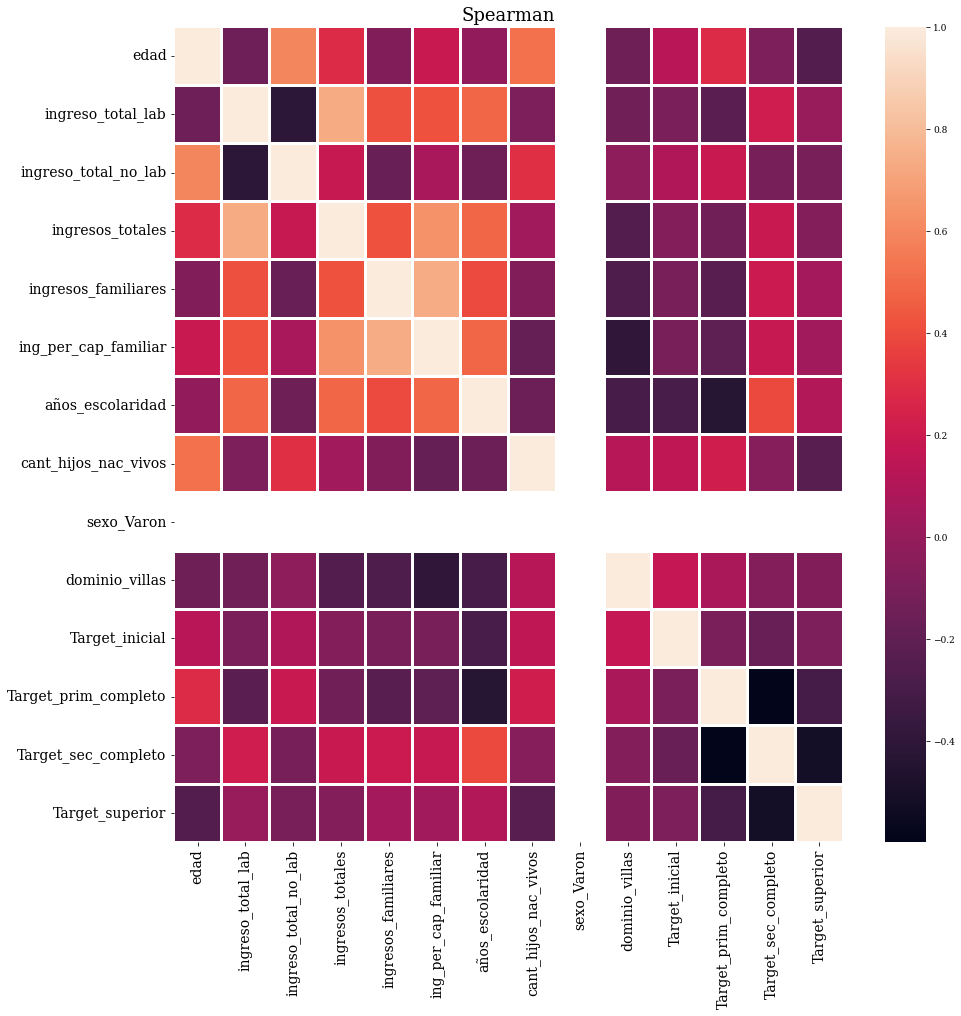

In [ ]:
#generacion de los graficos de correlacion con el método Spearman
plt.figure(figsize=(15,15))
plt.rcParams.update({"font.size":9,"axes.titlesize":15,"axes.labelsize":15, 'font.family':'serif'})
correlation = df.dropna().corr(method="spearman")
high_corr=correlation[correlation>=0.0]
sns.heatmap(correlation, linewidth = 2)
plt.title("Spearman", fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14);

A simple vista, no se observan fuertes correlaciones. Sorprende la relación entre la variable sexo_Varon y el resto. Convendría consultar con el profesor para saber qué puede estar ocurriendo.

Podemos notar que en la variable que habíamos elegido como target para clasificar por nivel educativo no muestra correlaciones fuertes con las demás variable. Sin embargo, su versión numérica (años_escolaridad) si. 
La principal correlación positiva es años_escolaridad con ingreso familiar per cápita (ing_per_cap_familiar), lo cual hace sentido teórico. Adicionalmente, el ingreso familiar per capita tiene una correlación fuerte negativa con dominio_villa


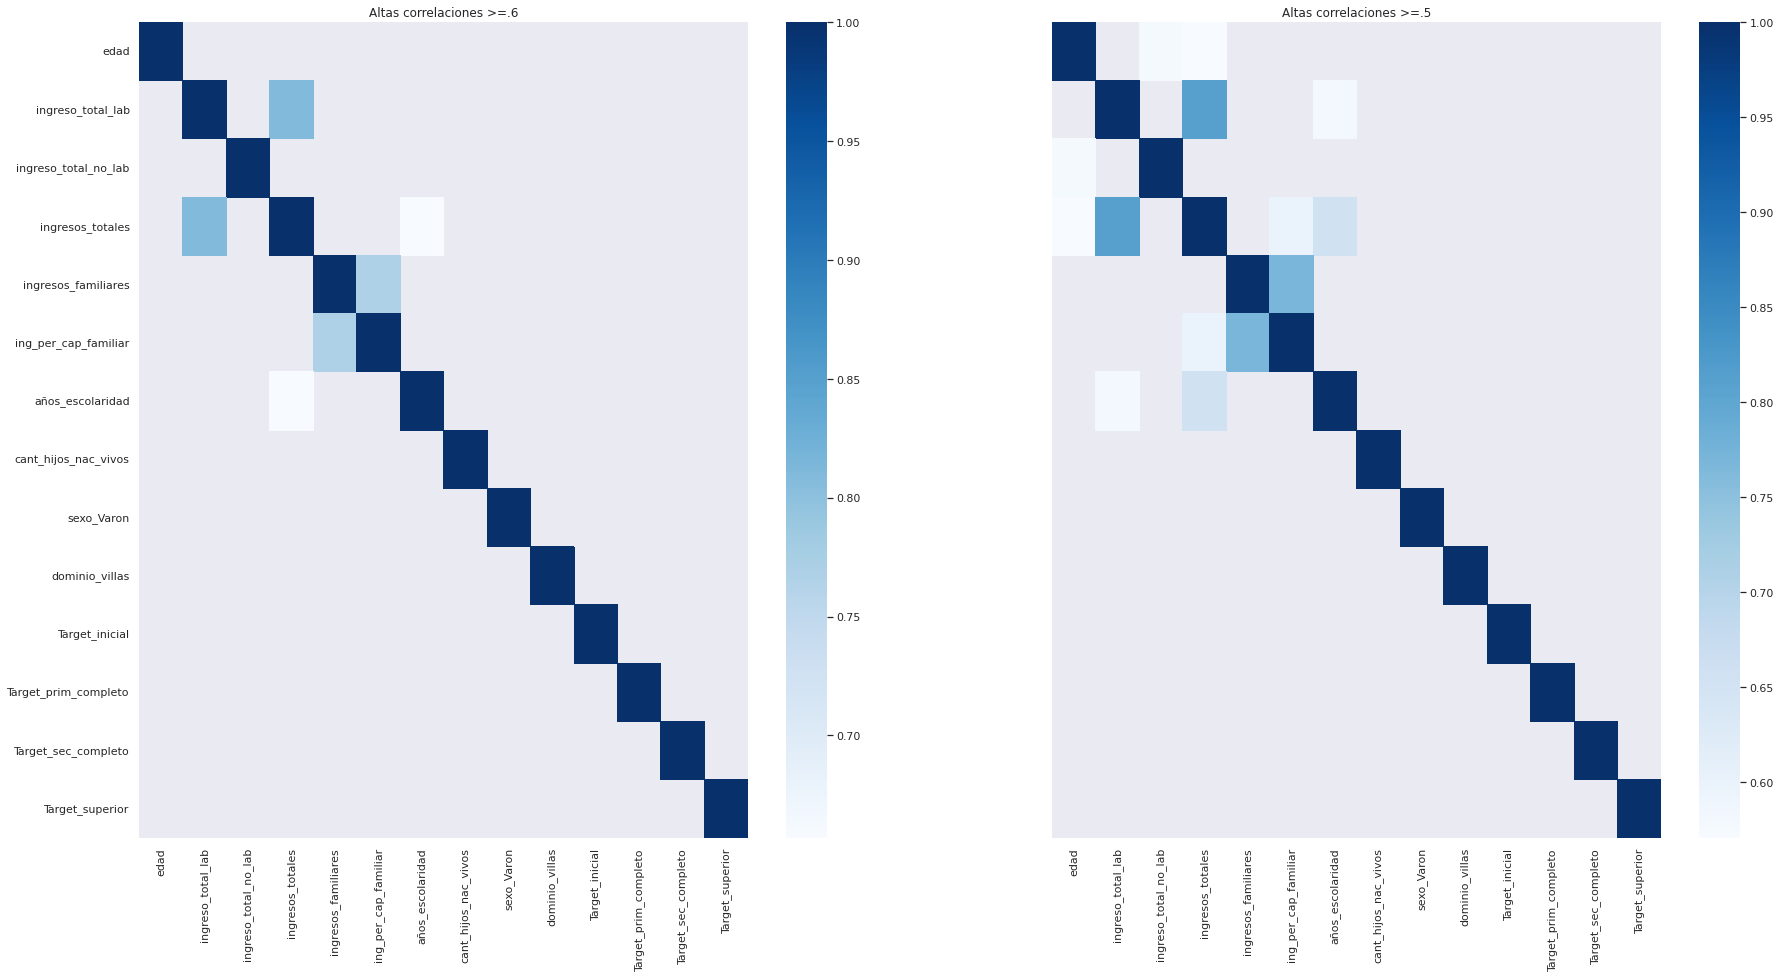

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

In [ ]:
#metodo para solo graficar en base a un threshold
fig , ax = plt.subplots(figsize=(30,15),ncols=2,sharey=True)
mat_corr_spearman = df.corr('spearman')

# filtro a 0.6 de correlacion
high_corr = mat_corr_spearman[mat_corr_spearman>=.6]
plt.figure(figsize=(12,8))
sns.heatmap(high_corr, cmap="Blues",ax=ax[0])
ax[0].set_title('Altas correlaciones >=.6');

#filtro de la matrix a 0.5 de correlacion
high_corr = mat_corr_spearman[mat_corr_spearman>=.5]
plt.figure(figsize=(12,8))
sns.heatmap(high_corr, cmap="Blues",ax=ax[1])
ax[1].set_title('Altas correlaciones >=.5')
sns.set(font_scale=1);

In [ ]:
def corrFilter(x: pd.DataFrame, thres: float):
    #generate corr 
    xCorr = x.corr('spearman')
    #filter corr by thres
    xFiltered = xCorr[((xCorr >= thres) | (xCorr <= -thres)) & (xCorr !=1.000)]
    #change dataframe format
    xFlattened = xFiltered.unstack().drop_duplicates().reset_index().sort_values(0, ascending= False).dropna()
    #rename columns
    xFlattened.columns = ['Variable_1', 'Variable_2', 'corr_value']
    return xFlattened

corrFilter(df, .5)

,Variable_1,Variable_2,corr_value
3,ingreso_total_lab,ingresos_totales,0.810840
7,ingresos_familiares,ing_per_cap_familiar,0.769356
6,ingresos_totales,años_escolaridad,0.656880
5,ingresos_totales,ing_per_cap_familiar,0.598997
4,ingreso_total_lab,años_escolaridad,0.579614
1,edad,ingreso_total_no_lab,0.578532
2,edad,ingresos_totales,0.570521
8,cant_hijos_nac_vivos,sexo_Varon,-0.569303


Conclusiones:



*   Como es esperable, hay alta correlación entre las variables relacionadas al ingreso
*   A su vez, encontramos una alta correlación (66%) entre los ingresos y los años de escolaridad
*   También observamos una relación positiva entre la edad y los ingresos totales
*   Por último, si bien no es tan alta como las demás correlaciones, parece que la cantidad de hijos nacidos vivos correlaciona negativamente con ser varón





# Comparación entre variables numéricas

Vamos a comparar las variables que nos dieron alta correlación

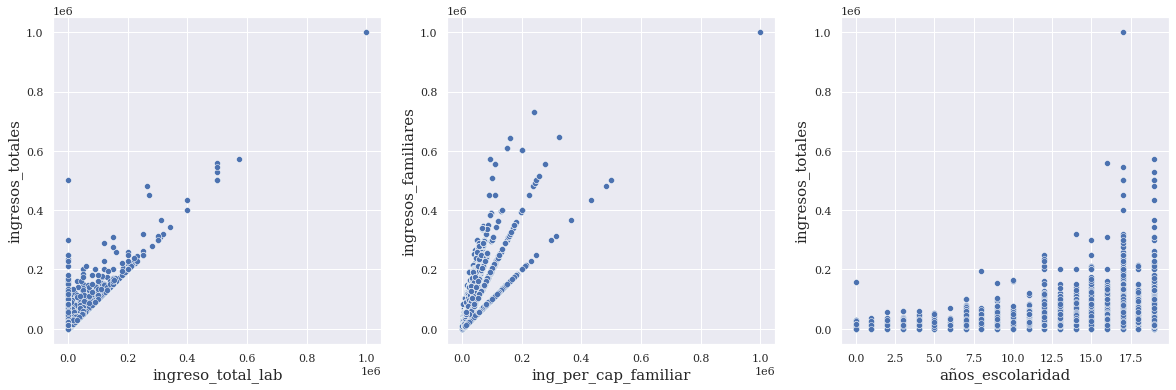

In [ ]:
#Numerica vs Numerica
#grafico usando un scatterplot y histograma
fig, ax = plt.subplots(figsize=(20,6),ncols=3)

sns.scatterplot(x = 'ingreso_total_lab', y= 'ingresos_totales', data=df,ax=ax[0])
sns.scatterplot(x = 'ing_per_cap_familiar', y= 'ingresos_familiares', data=df,ax=ax[1])
sns.scatterplot(x = 'años_escolaridad', y= 'ingresos_totales', data=df,ax=ax[2]);

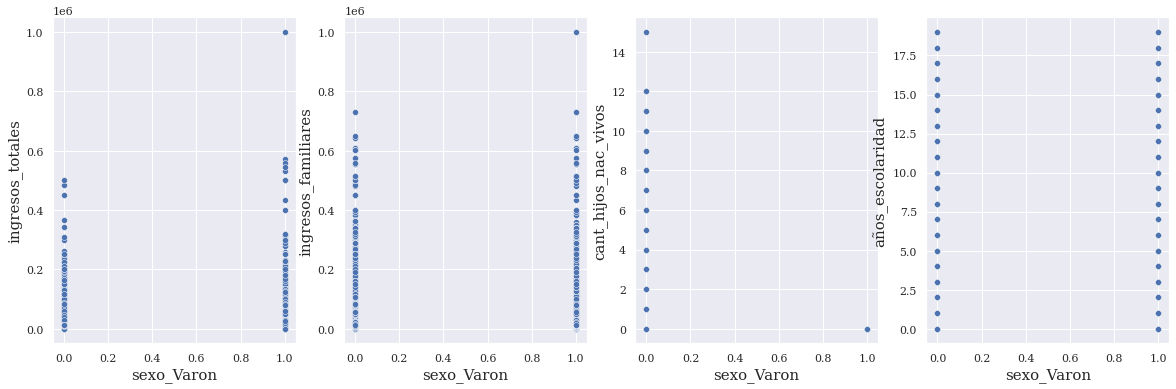

In [ ]:
fig, ax = plt.subplots(figsize=(20,6),ncols=4)

sns.scatterplot(x = 'sexo_Varon', y= 'ingresos_totales', data=df,ax=ax[0])
sns.scatterplot(x = 'sexo_Varon', y= 'ingresos_familiares', data=df,ax=ax[1])
sns.scatterplot(x = 'sexo_Varon', y= 'cant_hijos_nac_vivos', data=df,ax=ax[2])
sns.scatterplot(x = 'sexo_Varon', y= 'años_escolaridad', data=df,ax=ax[3]);

Por parte de las variables de ingreso, no parece haber nada disruptivo. 
La distribución por ingreso y años de escolaridad pareciera ocurrir pero no en un orden lineal

Sigue llamando la atención la variable sexo_Varon: por algún motivo, todos los encuestados hombres figuran sin hijos nacidos vivos. Alternativamente, se podría investigar la metodología de la encuesta para ver si hay alguna respuesta.
Adicionalmente, los hombres parecieran tener ingresos totales y familiares mayores que las mujeres (sexo_varon=0), pero no pareciera que haya distribuciones desiguales en los años de escolaridad

Ahora comparamos las variables de ingreso con la edad

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


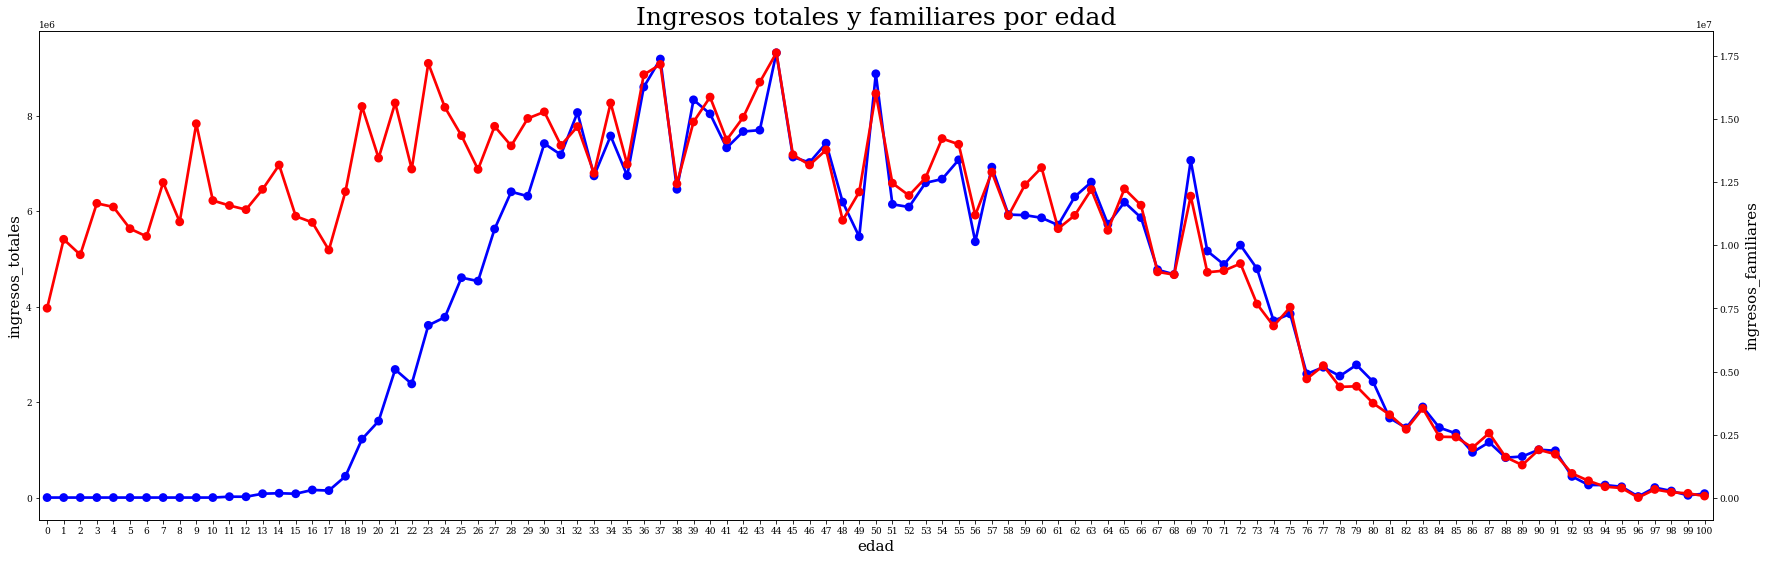

In [ ]:
# grafico lineal en base a edad con dos variables de calculo

plt.figure(figsize=(30, 9))

grouped_day = df.groupby('edad')['ingresos_totales', 
                                 'ingresos_familiares'].sum().reset_index()

ax = sns.pointplot(x = 'edad', y = 'ingresos_totales', data=grouped_day, 
                   color = 'blue', label='ingresos_totales');
ax2 = ax.twinx();
ax = sns.pointplot(x = 'edad', y = 'ingresos_familiares', data=grouped_day,  
                   color = 'red', label='ingresos_familiares', ax=ax2)

ax.set_title("Ingresos totales y familiares por edad",size=25);

Se puede ver que desde los 30 años en adelante el ingreso total de la persona se corresponde con el ingreso familiar. Por ende suele haber un unico ingreso fuerte por grupo familiar.

# Comparación de variables categóricas con numéricas

---



Adicionalmente, vamos a comparar algunas variables con nuestro target, comenzando con los ingresos totales.

In [ ]:
#categoricos vs numericos
pd.crosstab(df['Target'] , df['ingresos_totales']).T

Target,Nivel inicial,Nivel superior,Primario completo,Secundario completo
ingresos_totales,,,,
0,1259,492,346,1163
100,0,0,0,1
200,1,0,0,2
240,0,0,0,1
300,0,0,0,4
...,...,...,...,...
530000,0,0,0,1
545000,0,0,0,1
558000,0,1,0,0


[Text(0, 0.5, 'Nivel máximo educativo'),
 Text(0.5, 0, 'Ingresos familiares'),
 Text(0.5, 1.0, 'Ingresos familiares por nivel máximo educativo')]

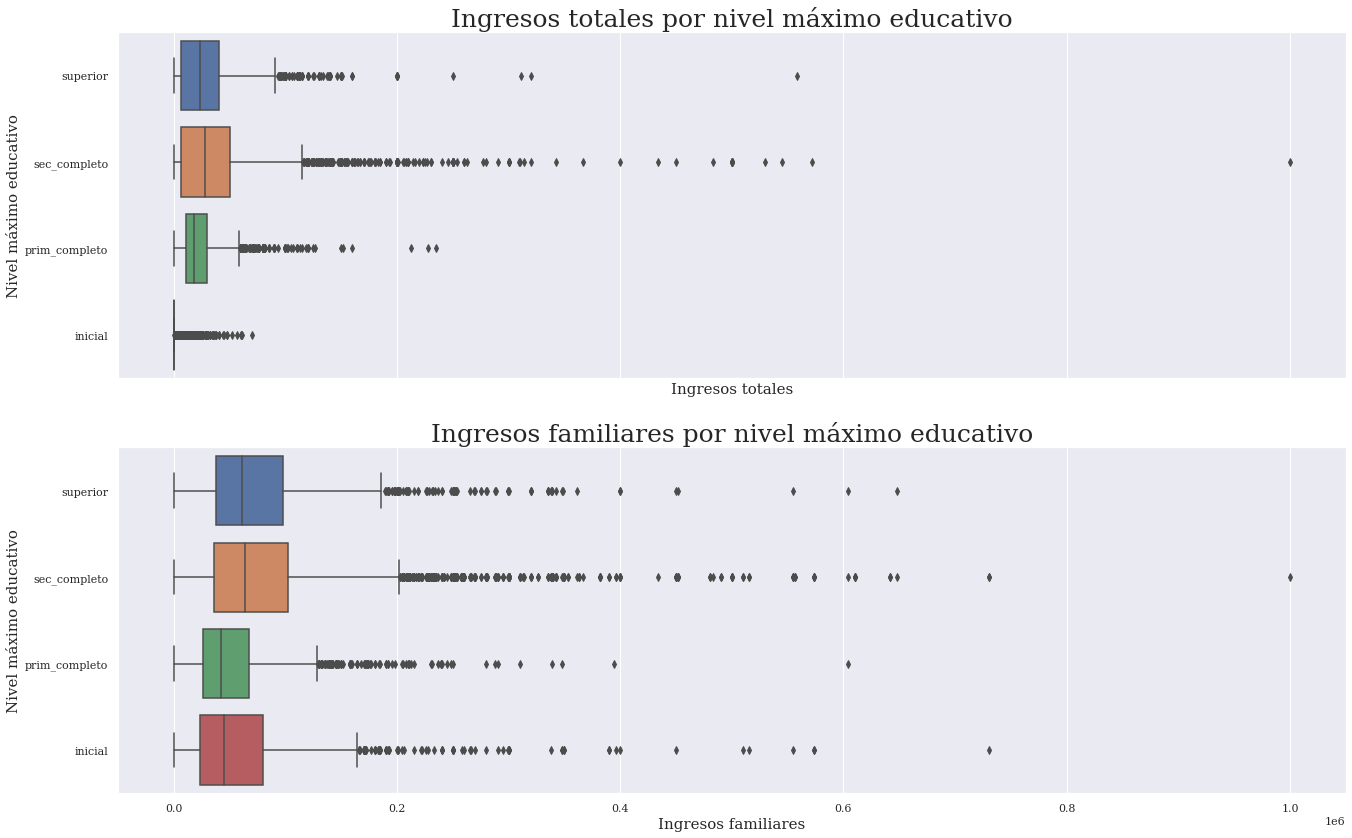

In [ ]:
fig, ax = plt.subplots(figsize=(22,14),nrows=2, sharex=True)
sns.boxplot(y = 'target', x='ingresos_totales', data=df,ax=ax[0]).set(title="Ingresos totales por nivel máximo educativo", ylabel="Nivel máximo educativo", xlabel="Ingresos totales")
sns.boxplot(y = 'target', x='ingresos_familiares', data=df,ax=ax[1]).set(title="Ingresos familiares por nivel máximo educativo", ylabel="Nivel máximo educativo", xlabel="Ingresos familiares")


Ingresos totales por persona vs su nivel maximo de educacion. Creo que este grafico tendría sentido contemplarlo ya que compara todo a nivel individuo. Se ve que hay casos con mayor nivel de ingreso y menor nivel de estudio (ej secundario vs terciario/unive)

 Se puede ver la diferencia del nivel maximo de educación entre las villas de emergencia y el resto de la ciudad. Estaria bueno relacionar el nivel maximo de educacion con las diferentes comunas

# Comparación entre variables categórica

Ahora vamos a comparar la variable target y los años de escolaridad con la variable comuna

In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 5.2 MB/s 
     |████████████████████████████████| 16.7 MB 389 kB/s 
     |████████████████████████████████| 6.3 MB 50.2 MB/s 


In [ ]:
import geopandas as gpd
#Vamos a generar un mapa, así que vamos a importar el mapa de comunas de la Ciudad de Buenos Aires
c = gpd.read_file("https://cdn.buenosaires.gob.ar/datosabiertos/datasets/comunas/CABA_comunas.geojson")

c["COMUNAS"] = c["COMUNAS"].str.replace(".00000000000","",regex=True)

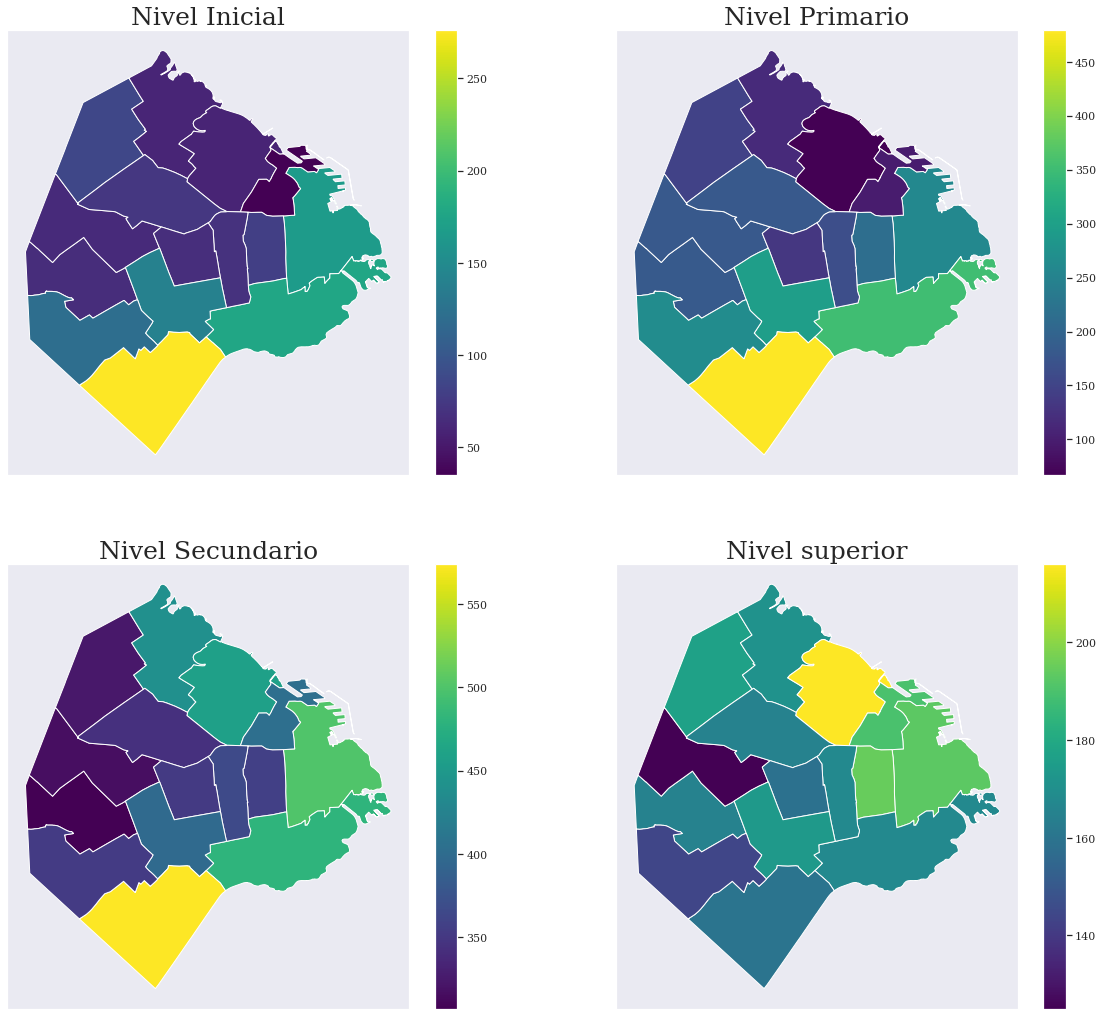

In [ ]:
# Unimos ambos datasets
comunas = gpd.GeoDataFrame(pd.merge(df.groupby("comuna").sum(),
                                    c[["COMUNAS","geometry"]],left_on="comuna",right_on="COMUNAS"))

comunas.iloc[:,0:15] = comunas.iloc[:,0:15].applymap(int)

#generamos el lienzo
fig , ax = plt.subplots(figsize=(20,18),ncols=2,nrows=2,sharex=True,sharey=True)
plt.rcParams.update({"font.size":12,"axes.titlesize":25,"axes.labelsize":15, 'font.family':'serif'})

def mapa(variable,etiqueta,fila,columna):
  #mapa
  comunas.plot(column=variable,legend=True,cmap="viridis",
            legend_kwds={'label': ""},ax=ax[fila,columna])

  #Título y etiquetas de variables    
  ax[fila,columna].set_title(etiqueta)
  ax[fila,columna].get_xaxis().set_visible(False)
  ax[fila,columna].get_yaxis().set_visible(False);

mapa("Target_superior","Nivel superior",1,1)
mapa("Target_sec_completo","Nivel Secundario",1,0)
mapa("Target_prim_completo","Nivel Primario",0,1)
mapa("Target_inicial","Nivel Inicial",0,0)

Se observa que en el sur de la ciudad hay  mayor cantidad de encuestados con niveles de inicial, primario y secundario completo, mientras que el norte (particularmente el barrio de Palermo) tiene mayor cantidad de personas con estudios superiores. En menor medida también las comunas del este (comunmente llamado el "centro" de la ciudad) destacan por la cantidad de encuestados con nivel superior.

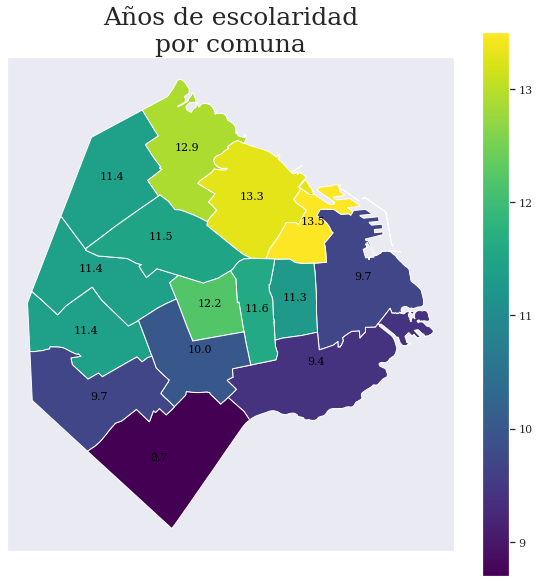

In [ ]:
import numpy as np

#armamos el mismo dataset anterior pero tomando el promedio de cada variable por comuna
comunas = gpd.GeoDataFrame(pd.merge(df.groupby("comuna").aggregate(np.mean),
                                    c[["COMUNAS","geometry"]],left_on="comuna",right_on="COMUNAS"))

#redondeamos los valores
comunas["años_escolaridad"] = round(comunas["años_escolaridad"],1)

#armamos el gráfico
fig, ax = plt.subplots(figsize=(10,10))

comunas.plot(column="años_escolaridad",legend=True,cmap="viridis",
             legend_kwds={'label': ""},ax=ax)

#genero una nueva variable con las coordenadas para poder agregar etiquetas en el centro geográfico de cada comuna
comunas['coords'] = comunas['geometry'].apply(lambda x: x.representative_point().coords[:])
comunas['coords'] = [coords[0] for coords in comunas['coords']]

for idx, row in comunas.iterrows():
    plt.annotate(s=row['años_escolaridad'], xy=row['coords'],
                 horizontalalignment='center',size=11,color="black")
    
#Título y etiquetas de variables    
ax.set_title("Años de escolaridad\npor comuna")
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False);

Lo que podemos observar en los últimos dos gráficos es una clara división geográfica del nivel educativo.

*  Las comunas del norte son las que tienen mayor nivel educativo
*  Las comunas del centro tienen niveles medios
*  Las comunas del sur (con las comuna 6 en el centro de la ciudad como outlier) y la comuna 1 en el este son las que tienen niveles más bajos